In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

In [0]:
path =  'gdrive/Shared drives/Predictive Fall 2019/GRevenue data/'	

In [0]:
train = pd.read_csv(path+ 'visitor_agg.csv',dtype={'fullVisitorId': 'str'})

In [0]:
test = pd.read_csv(path+ 'visitor_agg_test.csv',dtype={'fullVisitorId': 'str'})

In [132]:
max(train['transactionRevenue'])

69207310000.0

In [133]:
max(test['transactionRevenue'])

31035830000.0

In [122]:
train.shape

(1345163, 34)

In [123]:
train['fullVisitorId'].drop_duplicates().shape

(1323730,)

In [124]:
train.dtypes

Unnamed: 0                          int64
fullVisitorId                      object
timeperiod                          int64
hits_x                            float64
pageviews_x                       float64
timeOnSite_x                      float64
transactionRevenue                float64
sessionQualityDim                 float64
hits_y                            float64
pageviews_y                       float64
timeOnSite_y                      float64
channelGrouping                   float64
browser                           float64
deviceCategory                    float64
operatingSystem                   float64
city                              float64
continent                         float64
country                           float64
metro                             float64
networkDomain                     float64
region                            float64
subContinent                      float64
adContent                         float64
adwordsClickInfo.adNetworkType    

In [125]:
train.head()

,Unnamed: 0,fullVisitorId,timeperiod,hits_x,pageviews_x,timeOnSite_x,transactionRevenue,sessionQualityDim,hits_y,pageviews_y,timeOnSite_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days
0,0,0000000259678714014,4,19.0,13.0,129.0,0.0,6.0,9.5,6.5,64.5,4.0,35.0,0.0,7.0,540.0,2.0,218.0,100.0,19362.5,73.0,12.0,62.0,3.0,59008.0,11.0,4.0,0.5,7.0,5.0,3196.0,99.0,14.0,153.0
1,1,0000010278554503158,1,11.0,8.0,194.0,0.0,NaN,11.0,8.0,194.0,4.0,35.0,0.0,7.0,955.0,5.0,146.0,122.0,41471.0,482.0,1.0,62.0,3.0,59008.0,11.0,4.0,1.0,7.0,5.0,3196.0,99.0,80.0,53.0
2,2,0000020424342248747,1,17.0,13.0,297.0,0.0,NaN,17.0,13.0,297.0,4.0,35.0,0.0,20.0,423.0,2.0,159.0,0.0,24501.0,224.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0,121.0,12.0
3,3,0000027376579751715,2,6.0,5.0,49.0,0.0,NaN,6.0,5.0,49.0,4.0,35.0,0.0,7.0,955.0,2.0,218.0,122.0,7652.0,482.0,12.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0,60.0,107.0
4,4,0000039460501403861,2,2.0,2.0,99.0,0.0,NaN,2.0,2.0,99.0,7.0,35.0,0.0,20.0,955.0,2.0,28.0,122.0,39749.0,482.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,6.0,2665.0,343.0,104.0,63.0


In [126]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
pageviews_y,pageviews_y,0.003345
sessionQualityDim,sessionQualityDim,49.688997
timeOnSite_y,timeOnSite_y,50.226329


In [127]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
pageviews_y,pageviews_y,0.003372
timeOnSite_y,timeOnSite_y,44.022190


In [0]:
train['pageviews_y'].fillna(train["pageviews_y"].mean(axis = 0), inplace=True)
test['pageviews_y'].fillna(test["pageviews_y"].mean(axis = 0), inplace=True)

In [0]:
train['timeOnSite_y'].fillna(-1, inplace=True)
test['timeOnSite_y'].fillna(-1, inplace=True)

In [0]:
train['sessionQualityDim'].fillna(-999, inplace=True)

In [134]:
import sklearn
from sklearn.preprocessing import LabelEncoder

cat_cols = ["channelGrouping", "browser",
            "deviceCategory", "operatingSystem", 
            "city", "continent", "sessionQualityDim",
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", 
            "campaign",
            "keyword", "medium", 
            "referralPath", "source",
            'isTrueDirect']

for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str'))) # + list(test_df[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))

for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(test[col].values.astype('str'))) # + list(test_df[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

channelGrouping
browser
deviceCategory
operatingSystem
city
continent
sessionQualityDim
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
campaign
keyword
medium
referralPath
source
isTrueDirect
channelGrouping
browser
deviceCategory
operatingSystem
city
continent
sessionQualityDim
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
campaign
keyword
medium
referralPath
source
isTrueDirect


In [0]:
num_cols = ["hits_x","pageviews_x","hits_y", "pageviews_y","timeOnSite_x","timeOnSite_y","start_days","end_days","sessionQualityDim"]    
for col in num_cols:
    train[col] = train[col].astype(float)

for col in num_cols:
    test[col] = test[col].astype(float)

In [136]:
train.dtypes

Unnamed: 0                          int64
fullVisitorId                      object
timeperiod                          int64
hits_x                            float64
pageviews_x                       float64
timeOnSite_x                      float64
transactionRevenue                float64
sessionQualityDim                 float64
hits_y                            float64
pageviews_y                       float64
timeOnSite_y                      float64
channelGrouping                     int64
browser                             int64
deviceCategory                      int64
operatingSystem                     int64
city                                int64
continent                           int64
country                             int64
metro                               int64
networkDomain                       int64
region                              int64
subContinent                        int64
adContent                           int64
adwordsClickInfo.adNetworkType    

# Classifier Part

In [0]:
#creating the label
train['label'] = np.where(train['transactionRevenue']>0, 1,0)

In [235]:
train.columns

Index(['Unnamed: 0', 'fullVisitorId', 'timeperiod', 'hits_x', 'pageviews_x',
       'timeOnSite_x', 'transactionRevenue', 'sessionQualityDim', 'hits_y',
       'pageviews_y', 'timeOnSite_y', 'channelGrouping', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'subContinent', 'adContent',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.page', 'campaign', 'isTrueDirect', 'keyword',
       'medium', 'referralPath', 'source', 'start_days', 'end_days', 'label'],
      dtype='object')

In [236]:
test.columns

Index(['Unnamed: 0', 'fullVisitorId', 'hits_x', 'pageviews_x', 'timeOnSite_x',
       'transactionRevenue', 'sessionQualityDim', 'hits_y', 'pageviews_y',
       'timeOnSite_y', 'channelGrouping', 'browser', 'deviceCategory',
       'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'adContent',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.page', 'campaign', 'isTrueDirect', 'keyword',
       'medium', 'referralPath', 'source', 'start_days', 'end_days'],
      dtype='object')

In [0]:
#split dataset in features and target variable
X_classification = train[['hits_x', 'pageviews_x',
       'timeOnSite_x', 'sessionQualityDim', 'hits_y',
       'pageviews_y', 'timeOnSite_y', 'channelGrouping', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'adwordsClickInfo.adNetworkType', 
       'isTrueDirect', 'medium', 'referralPath', 'source', 'start_days', 'end_days']] # Features

y_classification = train['label'] # Target variable

In [238]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_classification, y_classification)

import collections 
collections.Counter(y_rus)

Counter({0: 16535, 1: 16535})

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

In [240]:
X_train1.shape

(26456, 24)

In [241]:
 y_train1.shape

(26456,)

In [0]:
from sklearn import datasets
import xgboost as xgb

D_train = xgb.DMatrix(X_train1, label=y_train1)
D_test = xgb.DMatrix(X_test1, label=y_test1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [243]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
xgb.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
scores = cross_val_score(xgb, X_train1, y_train1, cv=cv, scoring='roc_auc')

In [245]:
print(scores)

[0.99100926 0.99028493 0.98681384 0.990288   0.98790269]


In [246]:
print(xgb.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [247]:
# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=9)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}
print(params)

{'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [1, 2, 3, 4, 5, 6], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]}


In [251]:
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=20, cv=cv, random_state=42, n_jobs=-1,
                         scoring='roc_auc', return_train_score=True)

rgs.fit(X_train1, y_train1)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=Non...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 

In [252]:
# Evaluate best models on the hold-out set
best_xgb = rgs.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [253]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import accuracy_score

best_xgb.fit(X_train1, y_train1)

y_pred_proba_xgb = best_xgb.predict_proba(X_test1)[:,1]
prediction = best_xgb.predict(X_test1)

# Getting the classification report for the fitted model 
print("Prediction Accuracy is ",accuracy_score(y_test1, prediction))
print("Classification report is ",classification_report(y_test1, prediction))
print("Confusion matrix is ")
print(confusion_matrix(y_test1, prediction))


Prediction Accuracy is  0.9659812518899304
Classification report is                precision    recall  f1-score   support

           0       0.98      0.95      0.97      3319
           1       0.95      0.98      0.97      3295

    accuracy                           0.97      6614
   macro avg       0.97      0.97      0.97      6614
weighted avg       0.97      0.97      0.97      6614

Confusion matrix is 
[[3152  167]
 [  58 3237]]


In [254]:
y_pred_proba_xgb = best_xgb.predict_proba(X_test1)[:,1]
fpr, tpr, thresh = roc_curve(y_test1, y_pred_proba_xgb)

auc_score = auc(fpr, tpr)
auc_score

0.9897775762028619

# Regression Part

In [0]:
#split dataset in features and target variable
X_regression = train[['hits_x', 'pageviews_x',
       'timeOnSite_x', 'sessionQualityDim', 'hits_y',
       'pageviews_y', 'timeOnSite_y', 'channelGrouping', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'adwordsClickInfo.adNetworkType', 
       'isTrueDirect', 'medium', 'referralPath', 'source', 'start_days', 'end_days']] # Features

y_regression = np.log(train['transactionRevenue']+1) # Target variable - Taking the log of the regressor variable

In [256]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus2, y_rus2, id_rus = rus.fit_sample(X_regression, y_regression)


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got continuous instead.
  TARGET_KIND, type_of_target(y)))


In [0]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_rus2, y_rus2, test_size=0.2, random_state=42)

In [258]:
X_train2.shape

(5478, 24)

In [259]:
 y_train2.shape

(5478,)

In [0]:
from sklearn import datasets
import xgboost as xgb

D_train2 = xgb.DMatrix(X_train2, label=y_train2)
D_test2 = xgb.DMatrix(X_test2, label=y_test2)


In [260]:
from xgboost.sklearn import XGBRegressor

xgb2 = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb2.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
scores2 = cross_val_score(xgb2, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')

In [263]:
print(scores2)

[-1.27977593 -1.26082476 -1.61489695 -1.44000052 -1.34478359]


In [0]:
print(xgb2.get_params())

In [264]:
# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=9)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}
print(params)

{'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [1, 2, 3, 4, 5, 6], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]}


In [265]:
rgs2 = RandomizedSearchCV(estimator=xgb2, param_distributions=params, n_iter=20, cv=5, random_state=42, n_jobs=-1,
                         scoring='neg_mean_squared_error', return_train_score=True)

rgs2.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:squarederror',
                                          ra...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        '

In [266]:
# Evaluate best models on the hold-out set
best_xgb2 = rgs2.best_estimator_
best_xgb2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.6, verbosity=1)

In [0]:
predicted_reg = best_xgb2.predict(X_test2) #Prediction for the regression model

In [268]:
# JUST FOR THE REGRESSOR ALONE
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test2, predicted_reg)
print("mean square error",mse)
rms = sqrt(mean_squared_error(y_test2, predicted_reg))
print("root mean square error",rms)
mae=mean_absolute_error(y_test2, predicted_reg)
print("mean absolute error",mae)

mean square error 306.93890857878705
root mean square error 17.519672045411895
mean absolute error 17.472447985261574


In [0]:
# multiplying the classifier and the regressor to predict only for those columns which have classified as a transaction
predicted_classifier = best_xgb.predict(X_test2)
final_regression = predicted_classifier * predicted_reg

In [270]:
# JUST FOR THE CLASSIFIER AND THE REGRESSOR
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse=mean_squared_error(y_test2, final_regression)
print("mean square error",mse)
rms = sqrt(mean_squared_error(y_test2, final_regression))
print("root mean square error",rms)
mae=mean_absolute_error(y_test2, final_regression)
print("mean absolute error",mae)

mean square error 306.98657697278736
root mean square error 17.521032417434405
mean absolute error 17.47386056989965


# Training the model on the whole dataset and checking with the test dataset

In [282]:
groundtruth_prediction = np.log(test['transactionRevenue']+1)
groundtruth_prediction.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: transactionRevenue, dtype: float64

In [283]:
test.columns

Index(['Unnamed: 0', 'fullVisitorId', 'hits_x', 'pageviews_x', 'timeOnSite_x',
       'transactionRevenue', 'sessionQualityDim', 'hits_y', 'pageviews_y',
       'timeOnSite_y', 'channelGrouping', 'browser', 'deviceCategory',
       'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'adContent',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.page', 'campaign', 'isTrueDirect', 'keyword',
       'medium', 'referralPath', 'source', 'start_days', 'end_days'],
      dtype='object')

In [0]:
X_full_test = test[['hits_x', 'pageviews_x',
       'timeOnSite_x', 'sessionQualityDim', 'hits_y',
       'pageviews_y', 'timeOnSite_y', 'channelGrouping', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'adwordsClickInfo.adNetworkType', 
       'isTrueDirect', 'medium', 'referralPath', 'source', 'start_days', 'end_days']]

groundtruth_P = np.log(test['transactionRevenue']+1)
groundtruth_C = np.where(test['transactionRevenue']>0, 1,0)


In [285]:
# the best classifier
print(best_xgb)

# the best regressor model
print(best_xgb2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.6, verbosity=1)


In [0]:
X_full_train = train[['hits_x', 'pageviews_x',
       'timeOnSite_x', 'sessionQualityDim', 'hits_y',
       'pageviews_y', 'timeOnSite_y', 'channelGrouping', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'adwordsClickInfo.adNetworkType', 
       'isTrueDirect', 'medium', 'referralPath', 'source', 'start_days', 'end_days']]

Y_full_train_c = np.where(train['transactionRevenue']>0, 1,0)
Y_full_train_R = np.log(train['transactionRevenue'] +1 )

In [300]:
#Predicting the best classifier
# best_xgb.fit(X_full_train,Y_full_train_c)
best_xgb.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [0]:
classification_final = best_xgb.predict(X_full_test.values)

In [302]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import accuracy_score

# Getting the classification report for the fitted model 
print("Prediction Accuracy is ",accuracy_score(groundtruth_C, classification_final))
print("Classification report is ",classification_report(groundtruth_C, classification_final))
print("Confusion matrix is ")
print(confusion_matrix(groundtruth_C, classification_final))

y_pred_proba_xgb = best_xgb.predict_proba(X_full_test.values)[:,1]
fpr, tpr, thresh = roc_curve(groundtruth_C, y_pred_proba_xgb)

auc_score = auc(fpr, tpr)
print("The auc_score is ",auc_score)

Prediction Accuracy is  0.9283613799615553
Classification report is                precision    recall  f1-score   support

           0       1.00      0.93      0.96    292374
           1       0.16      0.95      0.27      4156

    accuracy                           0.93    296530
   macro avg       0.58      0.94      0.62    296530
weighted avg       0.99      0.93      0.95    296530

Confusion matrix is 
[[271354  21020]
 [   223   3933]]
The auc_score is  0.980176122757532


In [0]:
#Predicting the best regressor model
best_xgb2.fit(X_full_train, Y_full_train_R)

In [0]:
Reg_final = best_xgb2.predict(X_full_test)

In [306]:
# JUST FOR THE REGRESSOR ALONE
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
Reg_final = np.where(Reg_final<0,0,Reg_final)

mse=mean_squared_error(groundtruth_P, Reg_final )
print("mean square error",mse)
rms = sqrt(mean_squared_error(groundtruth_P, Reg_final))
print("root mean square error",rms)
mae=mean_absolute_error(groundtruth_P, Reg_final )
print("mean absolute error",mae)

mean square error 3.368298206296187
root mean square error 1.8352924034867542
mean absolute error 0.3815599616067134


In [305]:
final = classification_final * Reg_final
final = np.where(final<0,0,final)

mse=mean_squared_error(groundtruth_P, final )
print("mean square error",mse)
rms = sqrt(mean_squared_error(groundtruth_P, final))
print("root mean square error",rms)
mae=mean_absolute_error(groundtruth_P, final )
print("mean absolute error",mae)

mean square error 3.3511343018392075
root mean square error 1.830610363195622
mean absolute error 0.343789421407651


[0.23733681 0.48971704 0.03052822 0.0063493  0.0135928  0.03347636
 0.0069338  0.00715344 0.00457247 0.01009145 0.00754241 0.00409432
 0.06964827 0.02033363 0.00618786 0.00349219 0.00411635 0.00344791
 0.00989437 0.0077327  0.00659128 0.00994862 0.00362028 0.0035981 ]


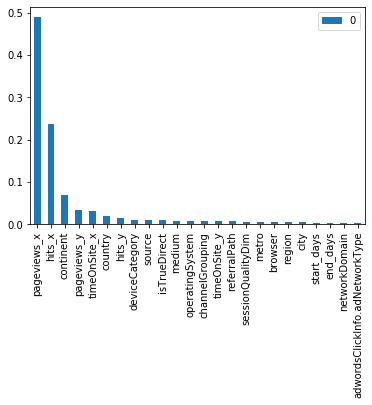

In [298]:
# Getting the most important features from both 
# for Classification 
print(best_xgb.feature_importances_)

importances = list(zip(best_xgb.feature_importances_, X_full_train.columns))
importances.sort(reverse=True)
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')

[0.0783221  0.1279674  0.0419727  0.01218646 0.01597573 0.03690407
 0.01846691 0.0405538  0.01177756 0.06642422 0.0519814  0.01840141
 0.08548011 0.11213217 0.02784393 0.0141311  0.01410859 0.00856712
 0.03830096 0.01610047 0.09993163 0.04052921 0.01040736 0.01153361]


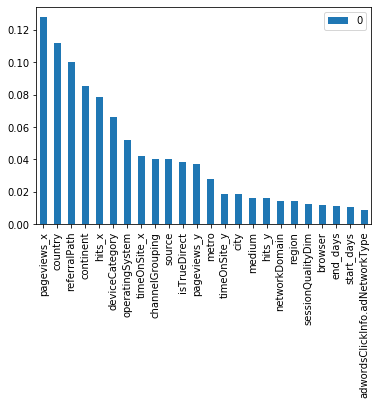

In [299]:
# for Regression 
print(best_xgb2.feature_importances_)

importances = list(zip(best_xgb2.feature_importances_, X_full_train.columns))
importances.sort(reverse=True)
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')